In [58]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from PIL import ImageFont, ImageDraw ,Image

In [5]:
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
    
] ,dtype = 'uint8')

kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
kernel = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[33 36 39]
 [42 45 48]
 [51 54 57]]


In [11]:
kernel = np.array([[0,0,0],
                  [0,0,0],
                  [1,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[5 4 5]
 [8 7 8]
 [5 4 5]]


In [13]:
img = np.array([
    [1,2,3],
    [4,25,6],
    [7,8,9]
    
] ,dtype = 'uint8')


kernel = np.array([[1,0,0],
                  [0,0,0],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[25  4 25]
 [ 2  1  2]
 [25  4 25]]


In [ ]:
'''
5 4 5 6 5
2 1 2 3 2
5 4 5 6 5
8 7 8 9 8
5 4 5 6 5
'''



In [15]:
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
    
] ,dtype = 'uint8')


kernel = np.array([[0,0,0],
                  [-1,0,1],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[0 2 0]
 [0 2 0]
 [0 2 0]]


In [16]:
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
    
] ,dtype = 'uint8')


kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [18]:
img = np.array([
    [1,2,3],
    [200,5,200],
    [7,8,9]
    
] ,dtype = 'uint8')


kernel = np.array([[0,0,0],
                  [1,0,1],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


In [19]:
img = np.array([
    [1,2,3],
    [200,5,200],
    [7,8,9]
    
] ,dtype = 'float')


kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])

filtered = cv2.filter2D(img,-1,kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [21]:
cv2.imwrite("output.png", filtered.astype('uint8'))

img= cv2.imread("output.png")
print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


In [30]:
ma=np.max(filtered)
mm= np.min(filtered)

#np.ptp(fitered)
n= (filtered - mm) / (ma -mm) *255 # -2 ~ 0 => 0 ~ 255
print(n)


n2 = np.abs(filtered) /  np.max(np.abs(filtered)) *255  # 0~ 2 => 0 ~ 255
print(n2)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]


In [33]:
norm = cv2.normalize(filtered , None, 0,255, cv2.NORM_MINMAX)
norm = norm.astype('uint8')
print(norm)

[[255   0 255]
 [255 255 255]
 [255   0 255]]


In [40]:
img = cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)
img2 = img.astype('int16') # 소수점이 나올일 없을때는 int16, int8 -> 커널자체가 소수가 아닌경우

kernel = np.array([
    [0,+1,0],
    [0,0,0],
    [0,-1,0]
    
])

filtered =cv2.filter2D(img2,-1,kernel) + 128

print(np.min(filtered)) 
print(np.max(filtered))

cv2.imwrite("output.png", filtered)

-62
298


True

In [45]:
img = cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)
img2 = img.astype('int16') # 소수점이 나올일 없을때는 int16, int8 -> 커널자체가 소수가 아닌경우

kernel = np.array([
    [0,+1,0],
    [0,0,0],
    [0,-1,0]
    
])

filtered =cv2.filter2D(img2,-1,kernel) 

print(np.min(filtered)) 
print(np.max(filtered))

cv2.imwrite("output.png", filtered)

filtered2 =cv2.filter2D(img2,-1,kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered2)) 
print(np.max(filtered2))

cv2.imwrite("output2.png", filtered2)

-190
170
0
255


True

In [50]:
# 수직 필터 -> 수평 에지 검사
img = cv2.imread("shape.png",cv2.IMREAD_GRAYSCALE)
img2 = img.astype('int16') # 소수점이 나올일 없을때는 int16, int8 -> 커널자체가 소수가 아닌경우

kernel = np.array([
    [0,+1,0],
    [0,0,0],
    [0,-1,0]
    
])

filtered2 =cv2.filter2D(img2,-1,kernel)
#filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered2)) 
print(np.max(filtered2))

cv2.imwrite("output_shape.png", filtered2)


-255
255


True

In [55]:
img = cv2.imread("shape.png",cv2.IMREAD_GRAYSCALE)
img2 = img.astype('int16') # 소수점이 나올일 없을때는 int16, int8 -> 커널자체가 소수가 아닌경우

kernel = np.array([
    [0,0,0],
    [0,+1,-1],
    [0,0,0]
    
])

filtered2 =cv2.filter2D(img2,-1,kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered2)) 
print(np.max(filtered2))

cv2.imwrite("output_shape.png", filtered2)


0
255


True

(537, 537, 3)


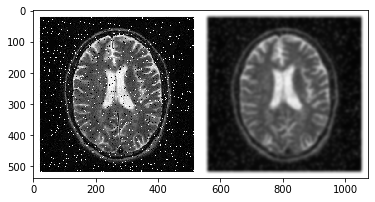

In [61]:
img =cv2.imread("brain.jpeg")
print(img.shape)
gauss = cv2.GaussianBlur(img,(25,25), 0)
plt.imshow(np.hstack([img,gauss]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


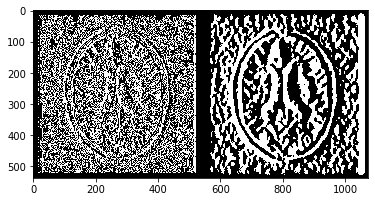

In [64]:
out1 = cv2.Sobel(img, cv2.CV_64F , 1,0, ksize=3)
out2 = cv2.Sobel(gauss , cv2.CV_64F,1,0,ksize=3)

plt.imshow(np.hstack([out1,out2]))

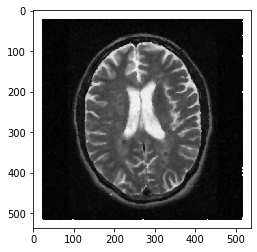

In [65]:
median = cv2.medianBlur(img,5)
plt.imshow(median)

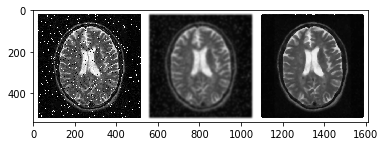

In [71]:
median = cv2.medianBlur(img,9)
plt.imshow(np.hstack([img, gauss ,median]))
#  median은 고주파 중간값을 그대로 가져오는 것이기떄문에 고주파 성분이 남아있고 
# 가우시안 성분은 평균을 내는 것이기떄문에 많이 업서진다.


영상에서 에지정보를 추출하기 전에는 가우시안 필터나 미디안 필터를 이용해 잡을을 먼저 제거해야한다.
그렇지 않으면 정확한 에지정보를 찾 을 수가 없다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


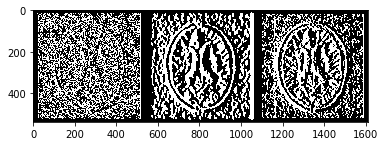

In [72]:
out1 = cv2.Sobel(img, cv2.CV_64F , 1,0, ksize=3)
out2 = cv2.Sobel(gauss , cv2.CV_64F,1,0,ksize=3)
out3 = cv2.Sobel(median , cv2.CV_64F,1,0,ksize=3)
plt.imshow(np.hstack([out1,out2,out3]))
